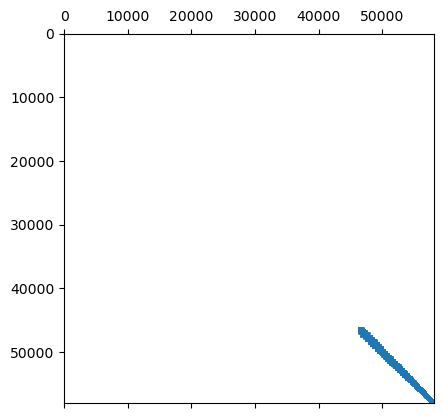

In [52]:
import ngsolve as ngs
from netgen.geom2d import unit_square
mesh = ngs.Mesh(unit_square.GenerateMesh(maxh=0.01))


order = 1
# Q = ngs.HDiv(mesh, order=order-1, discontinuous=True)
Q = ngs.VectorL2(mesh, order=order-1)
V = ngs.H1(mesh, order=order, dirichlet="bottom|right")

# F = FacetFESpace(mesh, order=order, dirichlet="bottom")
X = Q*V


(p,u),(q,v) = X.TnT()



K = ngs.BilinearForm(X, condense=True)
K += (p*q + ngs.grad(u)*q + p*ngs.grad(v)-1e-6*u*v)*ngs.dx
K.Assemble()

f = ngs.LinearForm(X, condense=True)
f += 1*v*ngs.dx
f.Assemble()

rows,cols,vals = K.mat.COO()
import scipy.sparse as sp
KS = sp.csr_matrix((vals,(rows,cols)))

import matplotlib.pylab as plt
plt.spy(KS, markersize=1)

gfx = ngs.GridFunction(X)
gfx.vec.data = K.mat.Inverse(X.FreeDofs(), inverse='pardiso') * f.vec

invS = K.mat.Inverse(freedofs=X.FreeDofs(coupling=True))
ext = ngs.IdentityMatrix() + K.harmonic_extension
extT = ngs.IdentityMatrix() + K.harmonic_extension_trans
invK =  ext @ invS @ extT + K.inner_solve

gfx.vec.data = invK * f.vec
gfp, gfu = gfx.components

In [55]:
from ngsolve.webgui import Draw
Draw(gfp)
Draw(gfu)

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

WebGuiWidget(layout=Layout(height='500px', width='100%'), value={'gui_settings': {}, 'ngsolve_version': '6.2.2…

BaseWebGuiScene